<a href="https://colab.research.google.com/github/lucdekeijzer/bachelor_thesis/blob/master/Thesis_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code to run the network

The code below runs the network on the folders in Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from tensorflow.keras import Model
from tensorflow.keras import models
from tensorflow.keras.applications import resnet
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
!pip install rasterio


     |████████████████████████████████| 19.3 MB 1.8 MB/s 


In [ ]:
CNN_model = keras.models.load_model("/content/drive/MyDrive/Bachelor Thesis/network") #loading the model

In [ ]:
from scipy.spatial import distance
from scipy.special import softmax
import time

#the final siamese cnn structure.
def siamese_cnn(picture_1, picture_2 = "/content/drive/MyDrive/Bachelor Thesis/train_try_png/train_try_fire_png/LC08_L1TP_046031_20200908_20200908_01_RT_p00614.png"):
  start_img_1 = time.time()
  start_overall = time.time()
  image = tf.io.read_file(picture_1)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [256, 256])
  image = tf.expand_dims(image, axis=0)
  image = tf.image.per_image_standardization(image)
  output_1 = CNN_model.predict(image)
  stop_img_1 = time.time()
  #output_1 = softmax(output_1)
  #print(output_1)
  print("time img 1 = ", stop_img_1 - start_img_1)

  start_img_2 = time.time()
  image_2 = tf.io.read_file(picture_2)
  image_2 = tf.image.decode_jpeg(image_2, channels=3)
  image_2 = tf.image.resize(image_2, [256, 256])
  image_2 = tf.expand_dims(image_2, axis=0)
  image_2 = tf.image.per_image_standardization(image_2)
  output_2 = CNN_model.predict(image_2)
  stop_img_2 = time.time()
  #output_2 = softmax(output_2)
  #print(output_2)
  print("time img 2 = ", stop_img_2 - start_img_2)

  result = distance.euclidean(output_1, output_2)
  stop_overall = time.time()
  print("time overall = ", stop_overall - start_overall)

  return result

#test run to see if the model works. This should print 221.87 as result
#print(siamese_cnn("/content/drive/MyDrive/Bachelor Thesis/test fire/LC08_L1TP_175074_20200916_20200916_01_RT_p00107.jpg","/content/drive/MyDrive/Bachelor Thesis/train_try_png/train_try_fire_png/LC08_L1TP_046031_20200908_20200908_01_RT_p00614.png"))
  

"""
over 180 with picture 2 = no fire
under 180 with picture 2 = fire
"""

time img 1 =  0.07414126396179199
time img 2 =  1.8368923664093018
time overall =  1.915452003479004
221.87347412109375


'\nover 180 with picture 2 = no fire\nunder 180 with picture 2 = fire\n'

In [ ]:
#code to evaluate the final accuracy of the model using the values of the confusion matrix.

TP = 0
TN = 0
FP = 0
FN = 0

for f in os.listdir("/content/drive/MyDrive/Bachelor Thesis/test/test"):
  output = siamese_cnn((os.path.join("/content/drive/MyDrive/Bachelor Thesis/test/test", f)))
#f = "/content/drive/MyDrive/Bachelor Thesis/test fire/LC08_L1TP_175074_20200916_20200916_01_RT_p00107.jpg"
#output = siamese_cnn(f)
  print(output)
  #print("f51",f[:51])
  print((os.path.join("/content/drive/MyDrive/Bachelor Thesis/test/test", f)))
  if output < 180: #no fire
  #if the output says that no fire is present in the picture, it will go through the folder with all the fire images in the test dataset
  #If it is not there, the prediction was correct and a TN is awarded, otherwise a FN is awarded'
    if (f[:-4] + ".jpg") not in os.listdir("/content/drive/MyDrive/Bachelor Thesis/test fire"):
      TN = TN + 1
    if (f[:-4] + ".jpg") in os.listdir("/content/drive/MyDrive/Bachelor Thesis/test fire"):
      FN = FN + 1
  else: # fire
  #if the output says that there is a fire, the code will go through the fire images test folder again
  #if the file is in that folder, the prediction was correct and a TP is awarded, otherwise a FP is awarded
    if (f[:-4] + ".jpg") in os.listdir("/content/drive/MyDrive/Bachelor Thesis/test fire"):
      TP = TP + 1
    if (f[:-4] + ".jpg") not in os.listdir("/content/drive/MyDrive/Bachelor Thesis/test fire"):
      FP = FP + 1

#/content/drive/MyDrive/Bachelor Thesis/test_try_png/test_jpg/LC08_L1TP_003006_20200911_20200911_01_RT_p00388.png
print("TP = {}, TN = {}, FP = {}, FN = {}".format(TP, TN, FP, FN))


153.0266571044922
/content/drive/MyDrive/Bachelor Thesis/test/test/LC08_L1GT_226074_20200921_20200921_01_RT_p00637.jpg
139.8409423828125
/content/drive/MyDrive/Bachelor Thesis/test/test/LC08_L1GT_226074_20200921_20200921_01_RT_p00663.jpg
149.7213592529297
/content/drive/MyDrive/Bachelor Thesis/test/test/LC08_L1GT_226074_20200921_20200921_01_RT_p00638.jpg
139.36703491210938
/content/drive/MyDrive/Bachelor Thesis/test/test/LC08_L1GT_226074_20200921_20200921_01_RT_p00628.jpg
154.52685546875
/content/drive/MyDrive/Bachelor Thesis/test/test/LC08_L1GT_226074_20200921_20200921_01_RT_p00670.jpg
142.66000366210938
/content/drive/MyDrive/Bachelor Thesis/test/test/LC08_L1GT_226074_20200921_20200921_01_RT_p00665.jpg
154.21627807617188
/content/drive/MyDrive/Bachelor Thesis/test/test/LC08_L1GT_226074_20200921_20200921_01_RT_p00640.jpg
155.25350952148438
/content/drive/MyDrive/Bachelor Thesis/test/test/LC08_L1GT_226074_20200921_20200921_01_RT_p00644.jpg
153.97018432617188
/content/drive/MyDrive/Bach

In [ ]:
import sklearn.metrics as metrics

accuracy = (TP + TN)/len(os.listdir("/content/drive/MyDrive/Bachelor Thesis/test/test"))
tp_rate = TP / (FN + TP)
tn_rate = TN / (TN + FP)
fp_rate = FP / (TN + FP)
recall = TP / (TP + FN)
precision = TP / (TP + FP)
f1_score = 2 * (precision * recall) / (precision + recall)

print(accuracy, recall, precision, f1_score)

0.9723756906077348 0.9 0.2727272727272727 0.41860465116279066


# Code to make and train the model

The code below is the code used to make, train and visualize the model

In [ ]:
#Building the Convolution and pooling layers
input_shape = (256, 256, 3)
CNN_model = models.Sequential()
CNN_model.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape = input_shape))
CNN_model.add(layers.MaxPooling2D((2,2)))
CNN_model.add(layers.Conv2D(64, (3, 3), activation= "relu"))
CNN_model.add(layers.MaxPooling2D((2,2)))
CNN_model.add(layers.Conv2D(64, (3, 3), activation= "relu"))

print("Convolutional and pooling layers \n")
CNN_model.summary()

print("\n")

#building the dense layers

CNN_model.add(layers.Flatten())
CNN_model.add(layers.Dense(64, activation = "relu"))
CNN_model.add(layers.Dense(64, activation = "relu"))
CNN_model.add(layers.Dense(64, activation = "relu"))
CNN_model.add(layers.Dense(2, activation = "relu"))

print("With dense layers \n")

CNN_model.summary()
#plot_model(CNN_model, show_shapes = True, show_layer_names= True)

NameError: ignored

In [ ]:
#setting up generators

src_path_train = "/content/drive/MyDrive/Bachelor Thesis/train_try_png"
src_path_test = "/content/drive/MyDrive/Bachelor Thesis/test_try_png"

train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

valid_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)


test_datagen = ImageDataGenerator(rescale=1 / 255.0)


train_generator = train_datagen.flow_from_directory(
    directory= "/content/drive/MyDrive/Bachelor Thesis/train_try_png",
    target_size= (256, 256),
    color_mode= "rgba",
    batch_size= 50,
    class_mode= "binary",
    shuffle= True,
    seed= 42
)

valid_generator = valid_datagen.flow_from_directory(
    directory = "/content/drive/MyDrive/Bachelor Thesis/valid_try_png",
    target_size = (256, 256),
    color_mode = "rgba",
    batch_size = 181,
    class_mode = "binary",
    shuffle = True,
    seed = 42
)

test_generator = test_datagen.flow_from_directory(
    directory = "/content/drive/MyDrive/Bachelor Thesis/test_try_png",
    target_size = (256, 256),
    color_mode = "rgba",
    batch_size = 131,
    class_mode = "binary",
    shuffle = False,
    seed = 42
)

In [ ]:
#compiling the model

CNN_model.compile(
    optimizer=keras.optimizers.Adam(lr = 0.0006),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#training the model

history = CNN_model.fit(train_generator,
                    validation_data = valid_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = valid_generator.n//valid_generator.batch_size,
                    epochs=15)

Epoch 1/15
125/125 [==============================] - 931s 7s/step - loss: 0.0803 - sparse_categorical_accuracy: 0.9848 - val_loss: 0.0829 - val_sparse_categorical_accuracy: 0.9890
Epoch 2/15
125/125 [==============================] - 147s 1s/step - loss: 0.0686 - sparse_categorical_accuracy: 0.9875 - val_loss: 0.0590 - val_sparse_categorical_accuracy: 0.9890
Epoch 3/15
125/125 [==============================] - 145s 1s/step - loss: 0.0694 - sparse_categorical_accuracy: 0.9875 - val_loss: 0.0810 - val_sparse_categorical_accuracy: 0.9876
Epoch 4/15
125/125 [==============================] - 147s 1s/step - loss: 0.0653 - sparse_categorical_accuracy: 0.9875 - val_loss: 0.0566 - val_sparse_categorical_accuracy: 0.9903
Epoch 5/15
125/125 [==============================] - 148s 1s/step - loss: 0.0646 - sparse_categorical_accuracy: 0.9873 - val_loss: 0.0545 - val_sparse_categorical_accuracy: 0.9903
Epoch 6/15
125/125 [==============================] - 142s 1s/step - loss: 0.0631 - sparse_cate

In [ ]:
#saving the model weights and structure for later use
CNN_model.save("Siamese CNN")

NameError: ignored

In [ ]:
from google.colab import files
files.download("/content/Siamese CNN")

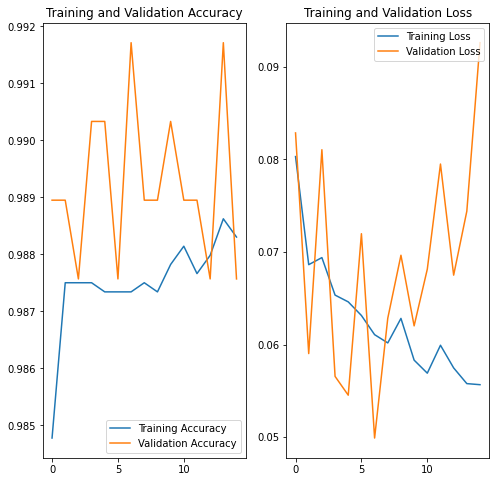

In [ ]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

#visualizing the accuracy and loss of the training and validation sets
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
CNN_model.evaluate(valid_generator, steps = valid_generator.n//valid_generator.batch_size)

4/4 [==============================] - 14s 3s/step - loss: 0.0597 - sparse_categorical_accuracy: 0.9931


[0.059671949595212936, 0.9930939078330994]